In [ ]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt # Matlab plots
import seaborn as sns # statistical plots
from scipy import* # for advanced maths 
import math 

In [11]:
# So first we will analyze decline curve on volve field data -
# AIM - We need to fit a known model in any dataset , we need to find optimal coefficients to make it fitting , it is an optimization problem
from scipy.optimize import curve_fit
#Fitting hyperbolic model to actual dataset

dca_df = pd.read_csv("D:\\Imp\\OilandGasDa\\DataFile\\norne_production_rate_sample.csv",index_col =0,parse_dates = True)
dca_df.head()

,Rate (SCF/d)
Date,
2004-04-01,2706039.0
2004-05-01,2492086.2
2004-06-02,1816846.1
2004-07-02,1920207.4
2004-07-04,1683521.4


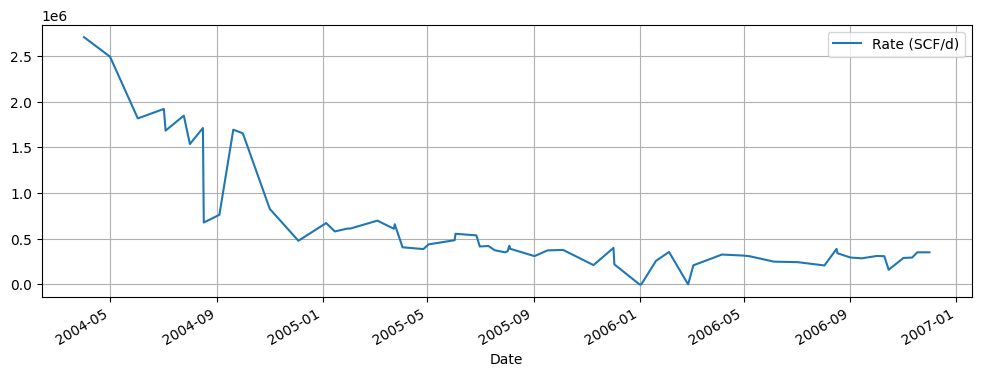

In [12]:
dca_df.plot(figsize=(12,4))
plt.grid()

In [ ]:
#Convert the day data to time data

def day_to_time(df):
    days= []
    for d in range(len(df)):
        delta = df.index[d] - df.index[0]
        days.append(delta.days)
    days =np.array(days)
    return days
dca_df['days'] = day_to_time(dca_df)
dca_df.head()


,Rate (SCF/d),days
Date,,
2004-04-01,2706039.0,0
2004-05-01,2492086.2,30
2004-06-02,1816846.1,62
2004-07-02,1920207.4,92
2004-07-04,1683521.4,94


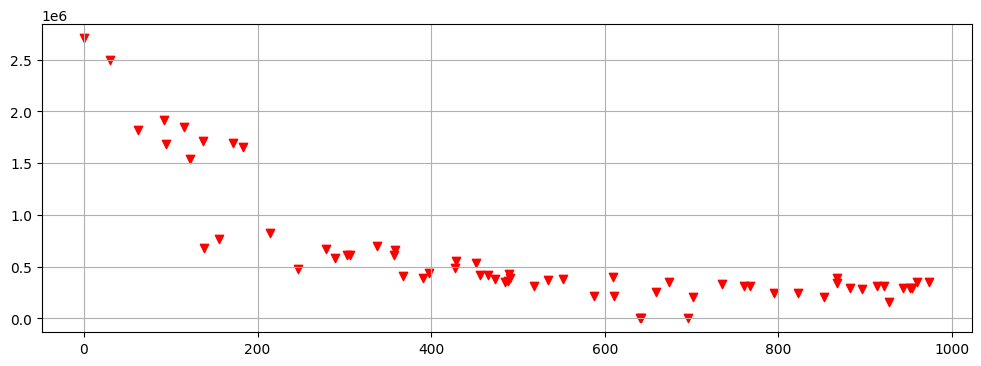

In [16]:
plt.figure(figsize=(12,4))
plt.scatter(dca_df['days'], dca_df['Rate (SCF/d)'],marker='v',color='red')
plt.grid()

In [19]:
#Now onto eqns:
def q_hyp(t,qi,b,d):
    qfit = qi/(np.abs((1+b*d*t))**(1/b))
    return qfit

def hyp_fitter(q,t):  # The values on one axis are too big and on one they are too small so we normalize else the analysis will be too slow
    #First normalize so that it converges well and quick
    q_n =q/max(q)
    t_n = t/max(t)

    #Curve_fit
    params =curve_fit(q_hyp,t_n,q_n)
    [qi,b,d] = params[0]


    # we have got for normalized q and t , we gotta find for original

    d_f = d/max(t)
    qi_f = qi*max(q)

    q_hyp_fit = q_hyp(t,qi_f,b,d_f)

    return q_hyp_fit,params

In [21]:
q =dca_df['Rate (SCF/d)'] ; t = dca_df['days']
q_fit ,params = hyp_fitter(q,t)

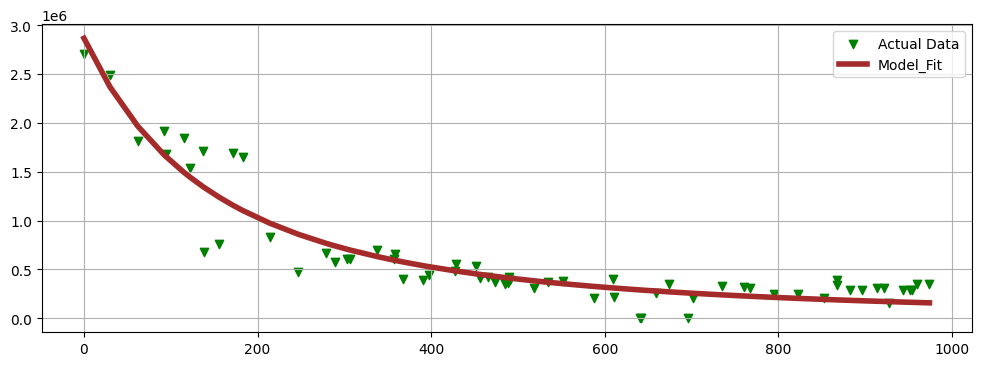

In [22]:
plt.figure(figsize=(12,4))
plt.scatter(t,q,marker ='v',color='green',label ="Actual Data")
plt.plot(t,q_fit ,color = 'brown',lw =4,label = 'Model_Fit')
plt.grid()
plt.legend()

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

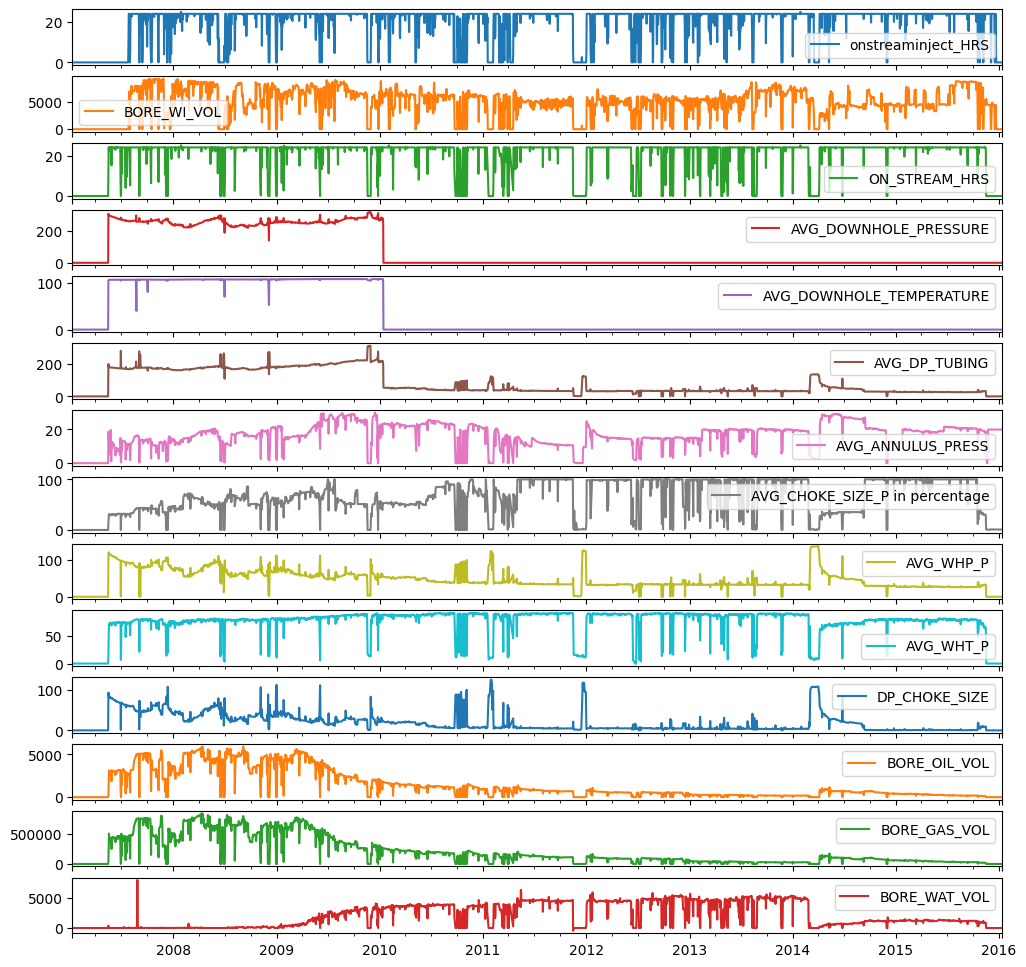

In [25]:
#Exploratory Data Analysis
df = pd.read_csv("D:\\Imp\\OilandGasDa\\DataFile\\Volve P-12_DatesCorrected.csv",index_col =0,parse_dates =True)
df.plot(subplots=True,figsize=(12,12))
df.columns


,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
onstreaminject_HRS,1.000000,0.841863,0.721919,-0.008906,0.012351,0.009337,0.612743,0.633598,-0.023190,0.672484,-0.263239,0.182405,0.187947,0.411186
BORE_WI_VOL,0.841863,1.000000,0.664087,0.200564,0.221163,0.200725,0.557878,0.521919,0.093025,0.603670,-0.121651,0.368739,0.374942,0.280289
ON_STREAM_HRS,0.721919,0.664087,1.000000,0.151285,0.165454,0.143750,0.664548,0.736508,0.145377,0.890115,-0.150569,0.361124,0.371698,0.441695
AVG_DOWNHOLE_PRESSURE,-0.008906,0.200564,0.151285,1.000000,0.995501,0.959016,0.043809,-0.236868,0.607089,0.067182,0.570080,0.819920,0.816354,-0.447753
AVG_DOWNHOLE_TEMPERATURE,0.012351,0.221163,0.165454,0.995501,1.000000,0.952678,0.050419,-0.220456,0.600172,0.077749,0.556476,0.850241,0.845233,-0.456028
AVG_DP_TUBING,0.009337,0.200725,0.143750,0.959016,0.952678,1.000000,0.085105,-0.247804,0.700270,0.081012,0.651796,0.778941,0.774962,-0.403919
AVG_ANNULUS_PRESS,0.612743,0.557878,0.664548,0.043809,0.050419,0.085105,1.000000,0.424520,0.023069,0.637504,-0.203826,0.163663,0.165688,0.299597
AVG_CHOKE_SIZE_P in percentage,0.633598,0.521919,0.736508,-0.236868,-0.220456,-0.247804,0.424520,1.000000,-0.259519,0.775045,-0.501936,-0.049757,-0.043856,0.676490
AVG_WHP_P,-0.023190,0.093025,0.145377,0.607089,0.600172,0.700270,0.023069,-0.259519,1.000000,0.103721,0.934167,0.544204,0.548123,-0.323962
AVG_WHT_P,0.672484,0.603670,0.890115,0.067182,0.077749,0.081012,0.637504,0.775045,0.103721,1.000000,-0.223074,0.245750,0.256457,0.580916


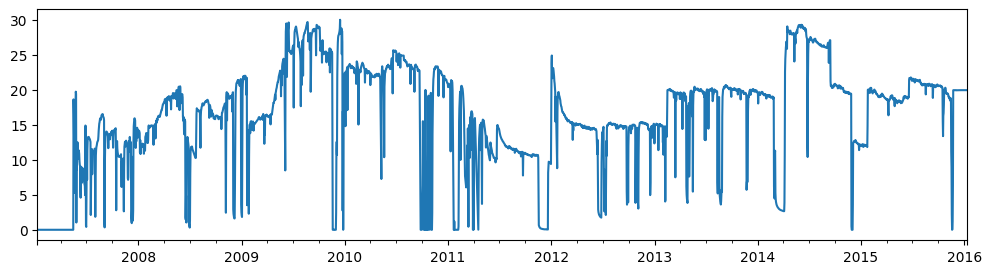

In [ ]:
df['AVG_ANNULUS_PRESS'].plot(figsize=(12,3))
df.corr()

onstreaminject_HRS                0.182405
BORE_WI_VOL                       0.368739
ON_STREAM_HRS                     0.361124
AVG_DOWNHOLE_PRESSURE             0.819920
AVG_DOWNHOLE_TEMPERATURE          0.850241
AVG_DP_TUBING                     0.778941
AVG_ANNULUS_PRESS                 0.163663
AVG_CHOKE_SIZE_P in percentage   -0.049757
AVG_WHP_P                         0.544204
AVG_WHT_P                         0.245750
DP_CHOKE_SIZE                     0.434375
BORE_OIL_VOL                      1.000000
BORE_GAS_VOL                      0.998661
BORE_WAT_VOL                     -0.364295
Name: BORE_OIL_VOL, dtype: float64

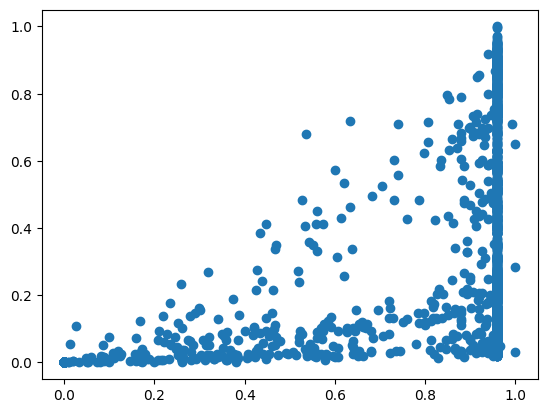

In [ ]:
plt.scatter(df['ON_STREAM_HRS']/max(df['ON_STREAM_HRS']),df['BORE_OIL_VOL']/max(df['BORE_OIL_VOL']))
#Correlation with bore oil volume

df.corr()['BORE_OIL_VOL']  # Each increase in ON stream hrs  - there is 36 %increase in bore oil volume


<Axes: >

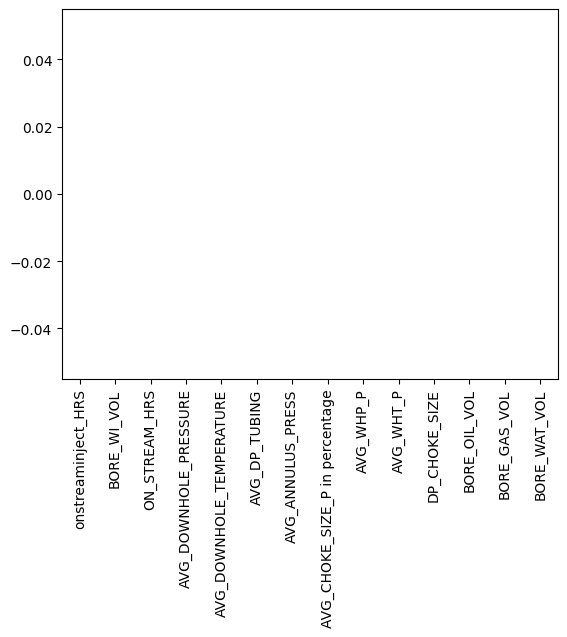

In [ ]:
df.isnull().sum().sort_values().plot(kind='bar') # So null value is present

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,19.528256,4935.663628,20.017419,76.283155,31.424488,80.758924,16.368846,64.158081,45.803679,74.345872,18.657338,1402.086752,204365.771346,2105.660438
std,8.669803,2625.955533,8.303784,118.248271,48.547561,73.006429,7.197959,33.810811,25.954204,26.140866,22.896388,1642.492700,232710.410394,1952.495950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3972.500000,24.000000,0.000000,0.000000,32.235500,12.543000,40.983840,32.199000,76.549000,3.663500,211.000000,33259.000000,40.500000
50%,24.000000,5335.000000,24.000000,0.000000,0.000000,37.921250,18.019000,65.988040,37.464000,81.693000,6.819000,664.000000,101142.000000,1260.000000
75%,24.000000,6851.500000,24.000000,235.838500,105.919000,170.045500,20.587000,99.895675,59.079500,90.002500,26.760500,2026.000000,295593.000000,4109.000000
max,25.000000,9316.000000,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


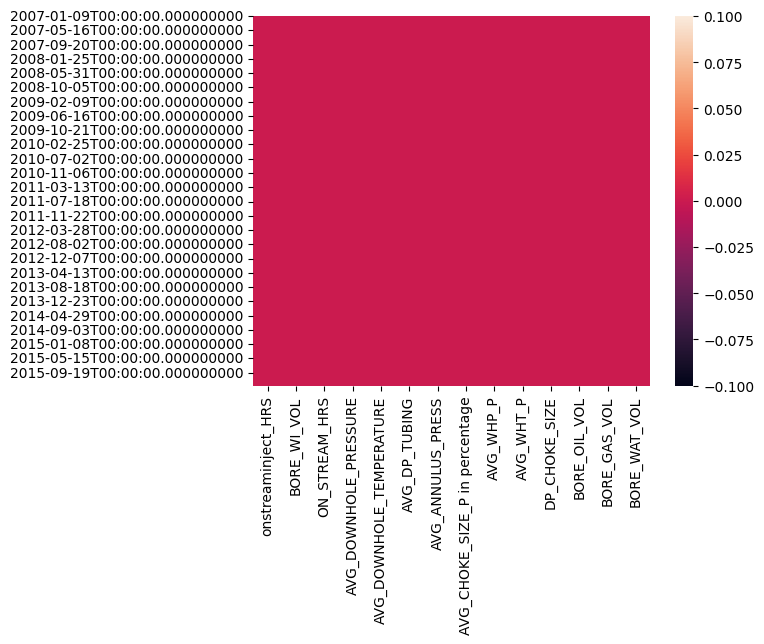

In [33]:
sns.heatmap(df.isnull())  #One more way to look for nulls
df.describe()